In [1]:
import pandas as pd
import os
import bibtexparser as btp
import pprint as pp
from IPython.display import clear_output
import matplotlib.pyplot as plt
import time

In [2]:
home = os.getcwd() + "/"
dirs = ["GS", "Sc", "SS", "WoS"]

In [3]:
articles_collection = pd.DataFrame()
max_count = 157

for d in dirs:
    
    print(len(articles_collection))
    
    time.sleep(5)
    
    i = 1
    
    while i < max_count:
        if d == "GS":
            articles_file_name = home + d + "/Q" + str(i) + ".csv"
        else:
            articles_file_name = home + d + "/q" + str(i) + ".csv"
            
        if os.path.exists(articles_file_name):
            articles = pd.read_csv(articles_file_name)
            
            #associo references
            #if d == "GS":
            #    references_file_name = home + d + "/Q" + str(i) + ".bib"
            #else:
            #    references_file_name = home + d + "/q" + str(i) + ".bib"
            #
            #if os.path.exists(references_file_name):
            #    with open(references_file_name) as bibtex_file:
            #        bibtex_references = btp.load(bibtex_file)
                
                #aggiungo references agli articles
            
            articles_collection = pd.concat([articles_collection, articles])
            
        print(d + ") " + str(i) + "/156 " + "New Articles: " + str(len(articles)))
        clear_output(wait=True)
        
        i = i + 1
        
print("Total Amount of Articles Collected: " + str(len(articles_collection)))

Total Amount of Articles Collected: 99599


In [4]:
#remove duplicates
articles_collection = articles_collection.drop_duplicates(subset=['Title', 'Authors'])

print("Total Amount of UNIQUE Articles Collected: " + str(len(articles_collection)))

Total Amount of UNIQUE Articles Collected: 45422


In [5]:
articles_collection_last_10_years = articles_collection[articles_collection['Year'] >= 2012.0]

print("Total Amount of Articles Collected (Year > 2011): " + str(len(articles_collection_last_10_years)))

Total Amount of Articles Collected (Year > 2011): 35810


In [6]:
articles_collection_last_10_years = articles_collection_last_10_years.sort_values(by=['Title'])

articles_collection_last_10_years.to_csv(home + 'unique_articles.csv')

In [24]:
articles_collection_last_10_years = articles_collection_last_10_years.sort_values(by=['Year'], ascending=False)

articles_collection_last_10_years.head()

,Cites,Authors,Title,Year,Source,Publisher,ArticleURL,CitesURL,GSRank,QueryDate,...,h_coverage,g_coverage,star_count,year_first,year_last,acc1,acc2,acc5,acc20,hA
0,1.0,"E Goforth, W El-Dakhakhni, L Wiebe",Step Through the Noise: Insight into Resilienc...,2023.0,Canadian Society of Civil …,Springer,https://link.springer.com/chapter/10.1007/978-...,https://scholar.google.com/scholar?cites=44429...,139.0,2022-07-13 10:32:22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,0.0,V. Unadkat,Code-free machine learning for object detectio...,2022.0,Neurosurgical Focus,NaN,NaN,https://www.scopus.com/inward/citedby.uri?part...,57.0,2022-07-12 16:31:31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,3.0,"P Unal, Ö Albayrak, M Jomâa, AJ Berre",Data-driven artificial intelligence and predic...,2022.0,Technologies and Applications …,Springer,https://link.springer.com/chapter/10.1007/978-...,https://scholar.google.com/scholar?cites=93832...,39.0,2022-07-12 13:35:23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,0.0,"Jian Wang, Shibin Gao, Long Yu, Dongkai Zhang,...",Predicting wind-caused floater intrusion risk ...,2022.0,Reliability Engineering & System Safety,NaN,NaN,NaN,86.0,2022-07-13 16:07:15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,0.0,"Guangnan Zhang, Zainab Hasan Ali, Mohammed Sul...",Reinforced concrete deep beam shear strength c...,2022.0,Engineering With Computers,NaN,NaN,NaN,66.0,2022-07-14 15:20:40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h4>Plot Statistics</h4>

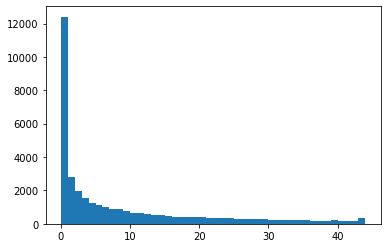

In [7]:
plt.hist(articles_collection['Cites'], bins=[i for i in range(0, 45)], log=False);

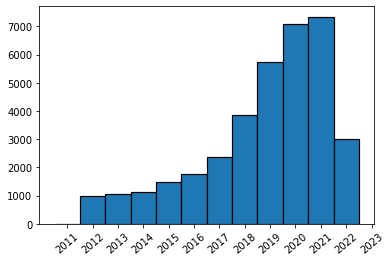

In [20]:
plt.hist(articles_collection_last_10_years['Year'], bins=[i-0.5 for i in range(2011, 2024)], log=False, edgecolor='black', linewidth=1.2)
plt.xticks([i for i in range(2011, 2024)], rotation = 40)
plt.savefig('papers_per_year.png')